In [2]:
import numpy as np
import pandas as pd
import itertools as it

import importlib
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
import bayseg

In [67]:
# data import
data = pd.read_csv("../data/synthetic_data_3.csv")                         # load the data from excel sheet  
feature_names =  ['GR','IND','PE','NEUDEN']    # define data that are considered by headers from excel sheet(Gamma Ray,Induction, Neutron-density, delta Neutron-density, Photoelectric effect)
BH1 = data.loc[20:39,feature_names]             # extract all feature of one borehole
coords = data.loc[20:39,'Z']

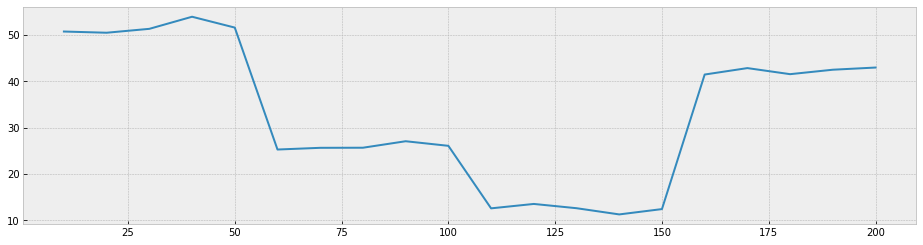

In [68]:
plt.figure(figsize = (16,4))
plt.plot(coords,BH1['GR'])

In [131]:
BH1_norm = bayseg.normalize_feature_vectors(BH1) # normalize data (.values just takes the values not the header and indicies)

In [132]:
# perform BaySeg clustering
clf = bayseg.BaySeg(BH1_norm, 4)

In [133]:
#BH1_norm = clf.labels[0]

In [159]:
# find first boundary

# var1 = []
# var2 = []
var_t = []
var_bz = []

for i in range(2,len(BH1_norm)-1):
    # var1.append(np.sum(np.var(BH1_norm[0:i])))
    # var2.append(np.sum(np.var(BH1_norm[i:-1])))
    var_t.append(np.sum(np.var(BH1_norm[0:i]))+np.sum(np.var(BH1_norm[i:-1])))
    var_bz.append(np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:-1])]))
    
if np.where(var_bz == max(var_bz))[0][0] == np.where(var_t == min(var_t))[0][0]:
    a = np.where(var_t == min(var_t))[0][0] + 2
else: print('Minimum variance within the zones != Maximum variance between the zones')

In [161]:
# find second boundary

var_t = []
var_bz = []

for i in [x for x in range(2,len(BH1_norm)-1) if x != a]:
    if i < a:
        var_t.append(np.sum(np.var(BH1_norm[0:i]))+np.sum(np.var(BH1_norm[i:a]))+np.sum(np.var(BH1_norm[a:-1])))
        var_bz.append(np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:a]),np.mean(BH1_norm[a:-1])]))
    else:
        var_t.append(np.sum(np.var(BH1_norm[0:a]))+np.sum(np.var(BH1_norm[a:i]))+np.sum(np.var(BH1_norm[i:-1])))
        var_bz.append(np.var([np.mean(BH1_norm[0:a]),np.mean(BH1_norm[a:i]),np.mean(BH1_norm[i:-1])]))
        
if np.where(var_bz == max(var_bz))[0][0] == np.where(var_t == min(var_t))[0][0]:
    b = np.where(var_t == min(var_t))[0][0] +3
else: print('Minimum variance within the zones != Maximum variance between the zones')

In [162]:
print(a,b)

5 15


In [ ]:
# find third boundary

var_t = []
var_bz = []

for i in [x for x in range(2,len(BH1_norm)-1) if x != a]: